# Along-Path Propagation Measurements for the 4 April 2024 Total Solar Eclipse
David Kazdan AD8Y, 29 August 2023


All of the HamSCI efforts to date in eclipse propagation measurement use signals sent from WWV in Colorado to receivers across the path of the eclipse from WWV.  We consider here testing along the eclipse path.

For that across path propagation, WWV’s location north of Denver puts one-hop signals that reflect from the eclipse path along the southeast Atlantic coast of the US.  Two-hop signals with eclipse path reflection land farther inland after their second hop; Atlanta is a predictable point.  The first earth strike of two hop signals are between WWV and the eclipse path and should not be affected by the eclipse.

Along-path propagation is different and may also be worth studying.  Note that by coincidence, the portion of the eclipse path from Cleveland into Texas approximates the great circle path that a radio signal would follow.  




## TODO:
 - [x] Make a Binder link.
 - [ ] Put all eclipse paths on map
 - [ ] Add dataframe for points of interest

Map features to add:
 - [ ] W8EDU
 - [ ] CHU
 - [ ] Ground paths between stations - compute binary fractions of paths with haversine formula, mark
 - [ ] KiwiSDRs in region of interest

## Maps
The coincidence of the two paths (eclipse and great-circle) suggests that a different propagation experiment might be done that involves a beacon transmitter at one extreme of this path, say Cleveland, and a receiver at the other.  Received signal amplitude may vary as parts of the ionosphere are blocked from sunlight by the moon’s shadow, and it may be possible to elucidate a pattern of skips, say single, double, and triple hop.

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import json
import geopandas as gpd

import aacgmv2
import datetime as dt
import numpy as np

import gpxpy
import gpxpy.gpx

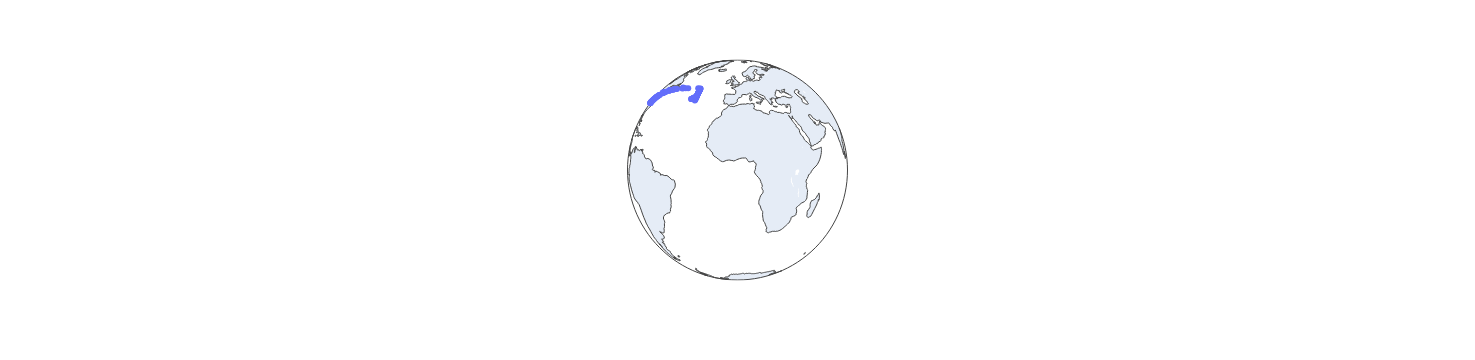

In [5]:
# url = 'http://aeronomy.haystack.mit.edu/share/eclipse_2017/eclipse20170821.txt.000km.hiRes'
# filename = 'input/eclipse20170821.txt.000km.hiRes'
filename = 'input/eclipse20240408.txt.150km.hiRes'
header = ["YEAR/M/DD", "HH:MM:SS",  "UTC", "MIN Magni", "LAT", "LONG"]
#Min Magni = minimum obscuration magnitude (ratio), based on the fraction of the visible solar disk area screened by the Moon
eclipse = pd.read_csv(filename, sep='\s+', names = header)

df = eclipse[['LAT', 'LONG']]
gpx = gpxpy.gpx.GPX()

# Create first track in our GPX:
gpx_track = gpxpy.gpx.GPXTrack()
gpx.tracks.append(gpx_track)

# Create first segment in our GPX track:
gpx_segment = gpxpy.gpx.GPXTrackSegment()
gpx_track.segments.append(gpx_segment)

# Create points:
for idx in df.index:
    gpx_segment.points.append(gpxpy.gpx.GPXTrackPoint(df.loc[idx, 'LAT'], df.loc[idx, 'LONG']))

# print(gpx.to_xml())
# with open('output/eclipse.gpx', 'w') as f:
#     f.write(gpx.to_xml())

fig = px.scatter_geo(df, lat=df["LAT"], lon=df["LONG"])
fig.update_geos(projection_type="orthographic")
fig.show()

fig.write_html("output/eclipse-map.html")

## Experiments
The simplest experiment that might be features a continuous-wave transmitter at one side and a receiver recording signal strength at the other.  The current WWV monitoring uses a variant on fldigi’s frequency monitoring modem to accomplish this, and a signal sent from W8EDU with periodic Morse or voice identification could be used.  The Doppler shift information so collected could be of use the same way that the WWV monitoring has been.  This measurement does require accurate frequency of the transmitted signal and an accurate timebase on the receiver.  We have been accomplishing that with GPS controlled oscillators on the receivers; WWV is already frequency accurate.  The data collection system, usually a microcomputer with a USB sound card pressed into service as the analog to digital converter, is kept timed by internet timing.  Its timing is not as critical as the frequency.

An alternative is examining transmitted sideband information.  WWV sends a full-carrier AM signal with several “radar of opportunity” modulations.  The second tick, consisting of five cycles of 1000 Hz sent at the beginning of most UTC seconds, provides a convenient pattern:

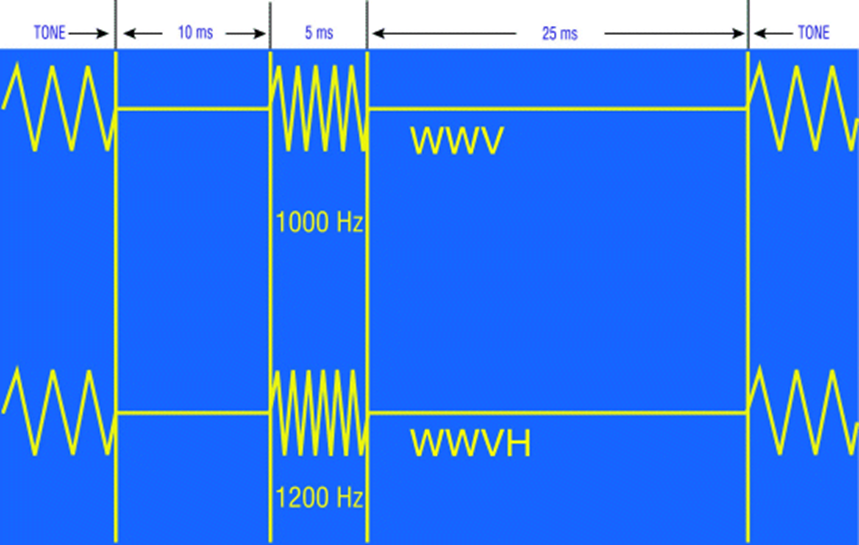
 

We have recorded several years of that tick, mostly on 25 MHz, and shown that time of flight and signal intensity are readily displayed.  The second ticks are sent with 100% modulation and may be received with an AM receiver that is not frequency-precise.  The data collection has been by a microcontroller’s analog-to-digital converter running about ten milliseconds into each second, started by a GPS receiver’s pulse-per-second leading edge.

The station might be sent within regulations on amateur bands with a Morse ID at least every ten minutes.

Coherent CW is a more complicated possibility.  It would have the promise of being more sensitive than the second ticks but would require more software development going into the eclipse.

Choice of frequency is another issue.  If we can only run one transmitter, the 30 meter amateur band may predictably offer the best signal variations.  If several transmitter-receiver pairs could be run, it would be interesting to include 80 meters; that band would not be expected to provide signal from Cleveland to Austin during the day at amateur power levels, but if the D layer is disrupted by the moon’s shadow, perhaps it would for brief times.


Another possibility:  Use the Canadian time-frequency standard station CHU-Canada, in Ottawa, Ontario.  Here is the great-circle map of Ottawa to Austin:
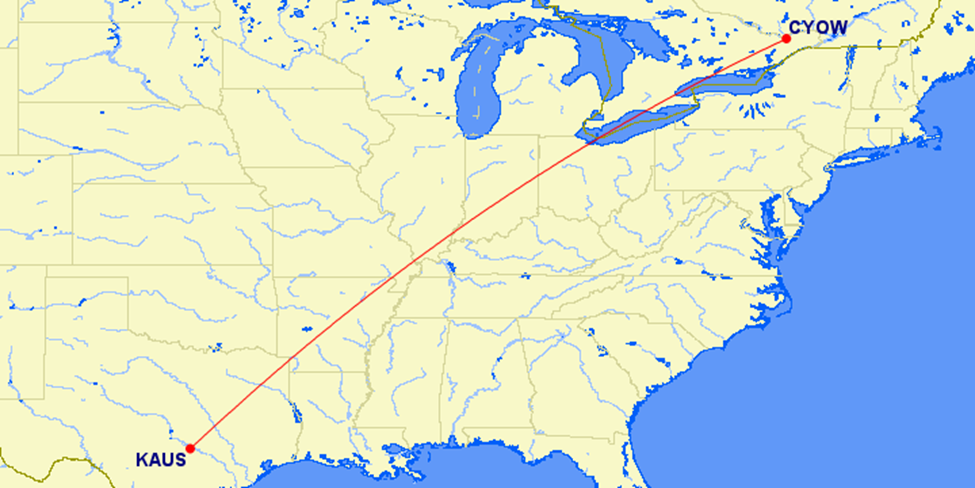
 

CHU transits signals that are roughly similar to WWV’s.  The format of the second ticks is slightly different from WWV’s but the existing second tick recording system could be modified to accommodate that.


|     Signal method   comparisons for along-path eclipse testing.    |                                                                                                                                                                                                                                                                                                                                                                                                                                 |                                                                                                                                                                                                                                                                                                     |
|--------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|     Modulation type                                                |     Pros                                                                                                                                                                                                                                                                                                                                                                                                                        |     Cons                                                                                                                                                                                                                                                                                            |
|     Steady carrier only,   ID by on/off telegraphy                 |          Simple to implement transmit        control: Arduino with keying transistor to transmitter key input.      Needs Morse ID, which is easy        to implement with Arduino.      Maximum signal power        transmitted.      Use current fldigi data        recording methods                                                                                                                                         |          Requires        frequency-disciplined receiver.      Gives only relative time of        flight information through Doppler shift.      Doesn’t give as definite a        null as some other methods–hard to know if signal is absent.                                                      |
|     WWV-style with second   ticks on AM                            |          Alternative method of        determining signal amplitude and time of flight.      Because time of flight is        absolute, comparison of different stations’ receptions is facilitated.      Can use simple receivers with        AM detector, no frequency discipline.                                                                                                                                             |          Data collection        microcontroller requires GPS control.      Different method from        currently implemented WWV Doppler                                                                                                                                                           |
|     Digital signal                                                 |          Use error rate as measure of        propagation.      Permits easier notification        of amateur radio community why the signal is there, maybe get less        deliberate interference.      Need frequency discipline on        neither transmitter nor receiver, just adequate stability.                                                                                                                        |          Would need more work to        implement than other methods.      Possibly less total        information obtained; would not get Doppler or time of flight        information.                                                                                                             |
|     Coherent CW message                                            |          Have much of the work already        done, especially on the transmit side.      May be more palatable to        amateur community to have CW on the air for several months rather than        continuous carrier..                                                                                                                                                                                                    |          Longer total message for        matched-filter decoding, so some information “smearing.” Something like        “W8EDU ECLIPSE TEST” could run only about four times per minute at 24        WPM.      Will require considerable        development and testing.                            |
|     Use CHU                                                        |          Three frequencies at higher        power than amateur, already available: 3.33, 7.85, 14.67 MHz.      Could use existing WWV second        tick recording system with small modifications.      Would need GPS receiver on        data collection board, not on receiver or host computer.      Alternatively, could use        frequency-accurate receiver and use fldigi as we have been using for        WWV.       |          Highest frequency is 14.67        MHz; that may not matter.      The station signal path isn’t        quite aligned with the longest stretch of eclipse great circle, but it’s        close.      Grape II is planned to work        with CHU, all three frequencies simultaneously.       |

## Acknowledgments
- Eclipse paths computed by Dr. Shunrong Zhang.